In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.pyplot import figure

%matplotlib inline

## Movie metadata 

In [4]:
# import character.metadata.tsv into pandas dataframe
movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t')

# convert column header into the first row of the data frame 
movie_metadata = movie_metadata.columns.to_frame().T.append(movie_metadata, ignore_index=True)
movie_metadata.columns = range(len(movie_metadata.columns))

# name columns headers
movie_metadata = movie_metadata.set_axis(['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres' ], axis=1, inplace=False)


movie_metadata.head(3)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [5]:
# add a column to the dataframe with movie release year
movie_metadata['Movie_release_year'] = movie_metadata['Movie_release_date'].str[:4]

In [6]:
# rewrite properly Movie_languages, Movie_countries, Movie_genres
movie_metadata['Movie_languages'] = [lang.split('"')[3::4] for lang in movie_metadata.Movie_languages]
movie_metadata['Movie_countries'] = [lang.split('"')[3::4] for lang in movie_metadata.Movie_countries]
movie_metadata['Movie_genres'] = [lang.split('"')[3::4] for lang in movie_metadata.Movie_genres]

In [7]:
# convert all the Movie_countries into string 
movie_metadata['Movie_countries'] = movie_metadata['Movie_countries'].astype(str)

In [8]:
# convert all the Movie release date into float
movie_metadata['Movie_release_year'] = movie_metadata['Movie_release_year'].astype(float)

In [8]:
# drop na values , make sense to remove all data with na, maybe something that it is not interesting for us 
#movie_metadata = movie_metadata.dropna()

In [9]:
# create a new dataframe having only movie countries 
movie_metadata_only_countries = pd.DataFrame(movie_metadata, columns = ['Movie_countries'])

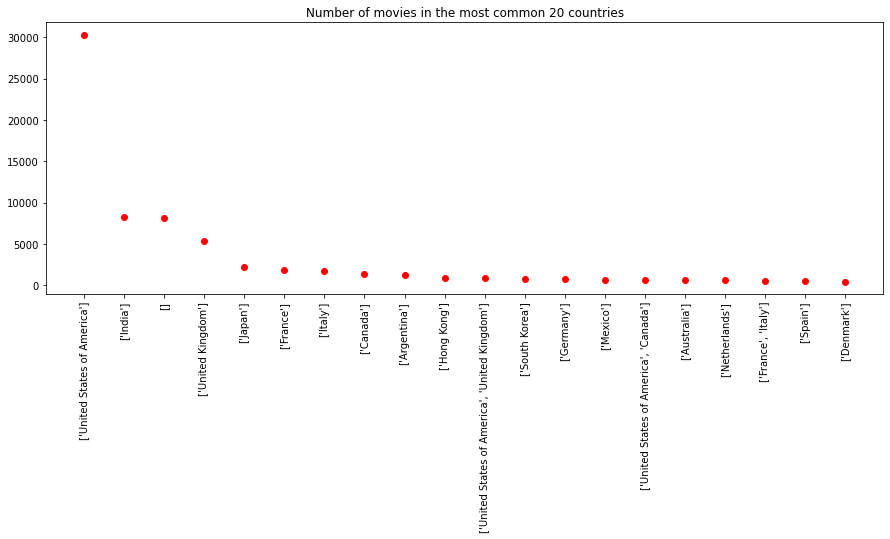

In [14]:
figure(figsize=(15, 5))

movie_metadata_only_countries['Movie_countries'].value_counts()[:20]

plt.plot(movie_metadata_only_countries['Movie_countries'].value_counts()[:20], 'ro')
plt.tick_params(axis='x', labelrotation = 90)
plt.title('Number of movies in the most common 20 countries')

plt.show()

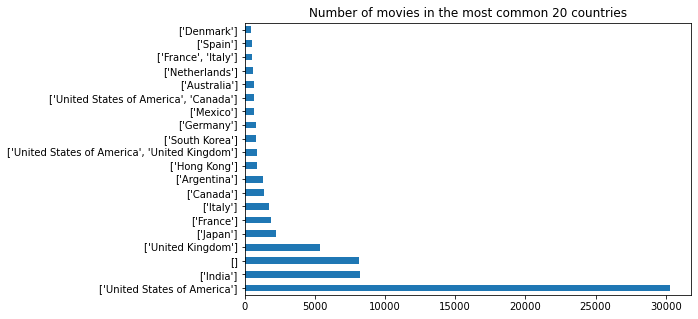

In [20]:
figure(figsize=(8, 5))

movie_metadata_only_countries['Movie_countries'].value_counts()[:20].plot(kind='barh')
plt.title('Number of movies in the most common 20 countries')

plt.show()

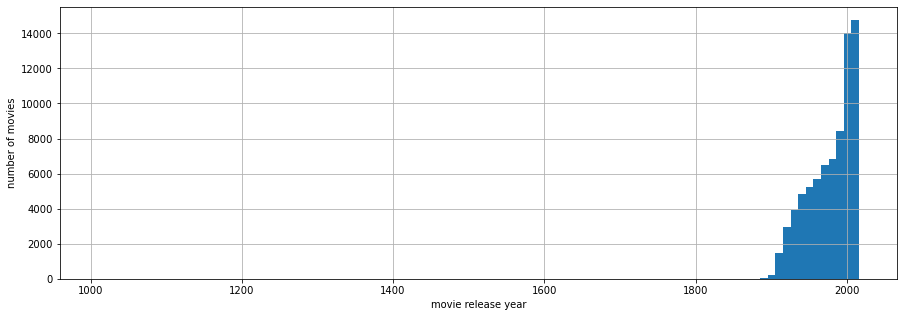

In [21]:
figure(figsize=(15, 5))

movie_metadata['Movie_release_year'].hist(bins = 100)

#plt.hist(movie_metadata['Movie_release_year'], bins = 100)

plt.xlabel('movie release year')
plt.ylabel('number of movies')
plt.title('Distribution of movie release by year')

plt.show()

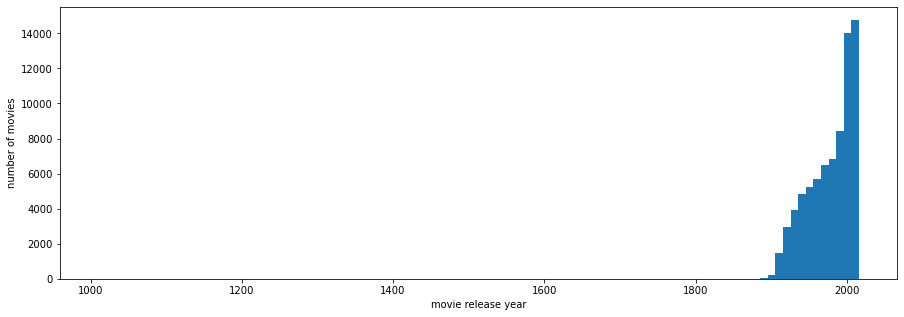

In [23]:
figure(figsize=(15, 5))

plt.hist(movie_metadata['Movie_release_year'], bins = 100)

plt.xlabel('movie release year')
plt.ylabel('number of movies')


plt.show()

### American movies 

In [26]:
usa_movi_metadata = movie_metadata[movie_metadata['Movie_countries'].str.contains('America')]

In [44]:
usa_movi_metadata.head(3)
#len(usa_movi_metadata)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,inf,98.0,[English Language],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],['United States of America'],"[Mystery, Biographical film, Drama, Crime Drama]",2000.0
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",['United States of America'],"[Short Film, Silent film, Indie, Black-and-whi...",1913.0


In [38]:
# remove rows of the dataframe that have a nan movie runtime
usa_movi_metadata = usa_movi_metadata.dropna(subset=['Movie_runtime'])

In [34]:
# convert values into np.float16, in order to avoid to have eg string
usa_movi_metadata['Movie_runtime'] = usa_movi_metadata['Movie_runtime'].astype(float)
usa_movi_metadata['Movie_box_office_revenue'] = usa_movi_metadata['Movie_box_office_revenue'].astype(float)


/var/folders/5w/096y26wd42gc877cwznm6zjm0000gn/T/ipykernel_13934/3650212659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_movi_metadata['Movie_runtime'] = usa_movi_metadata['Movie_runtime'].astype(float)
/var/folders/5w/096y26wd42gc877cwznm6zjm0000gn/T/ipykernel_13934/3650212659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_movi_metadata['Movie_box_office_revenue'] = usa_movi_metadata['Movie_box_office_revenue'].astype(float)


In [42]:
usa_movi_metadata['Movie_runtime'].astype(float).mean()

inf

In [46]:
#usa_movi_metadata['Movie_runtime'].hist(bins = 100)

#plt.xlabel('movie runtime')
#plt.ylabel('number of movies')

In [49]:
#figure(figsize=(5, 8), dpi=80)

#plt.boxplot(usa_movi_metadata['Movie_runtime'])
#plt.xticks([])
#plt.title('Movie runtime');

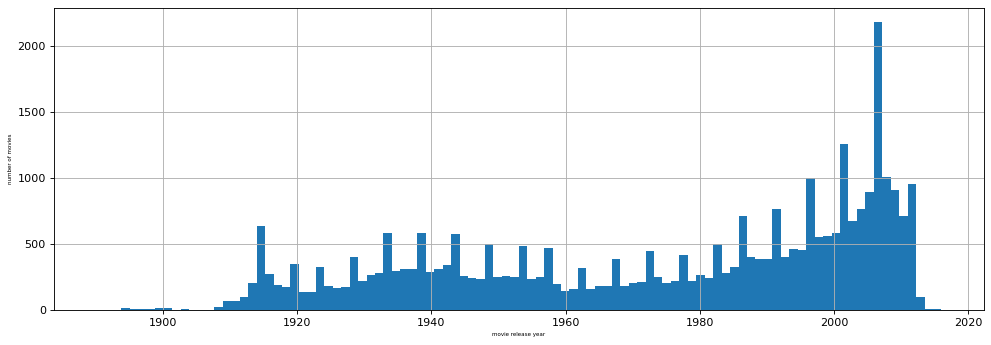

In [52]:
figure(figsize=(15, 5), dpi=80)

usa_movi_metadata['Movie_release_year'].hist(bins = 100)

plt.xlabel('movie release year')
plt.ylabel('number of movies')

plt.show()

In [18]:
# enable to remove all rows of the column movie runtime that do not have a float, 
# in reality it seems nothing is removed
# df = usa_movi_metadata.drop(usa_movi_metadata[usa_movi_metadata['Movie_runtime'] == float].index)


### Character Metadata

In [53]:
# import character.metadata.tsv into pandas dataframe
character_metadata = pd.read_csv('./data/character.metadata.tsv',sep='\t')

# convert column header into the first row of the data frame 
character_metadata = character_metadata.columns.to_frame().T.append(character_metadata, ignore_index=True)
character_metadata.columns = range(len(character_metadata.columns))

# name columns headers
character_metadata = character_metadata.set_axis(['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_release_date', 'Character_Name', 'Actor_DOB', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_Name', 'Actor_age_movie_release', 'Freebase_character_map', 'no_idea', 'no_idea_2' ], axis=1, inplace=False)

character_metadata.head(3)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_release_date,Character_Name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_Name,Actor_age_movie_release,Freebase_character_map,no_idea,no_idea_2
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l


In [54]:
character_metadata['Actor_age_movie_release'] = character_metadata['Actor_age_movie_release'].astype(np.float16)

In [56]:
female_character_metadata = character_metadata[(character_metadata['Actor_gender'] == 'F')]
print('number female characters', len(female_character_metadata), ', with age mean of', female_character_metadata['Actor_age_movie_release'].astype(float).mean())

number female characters 134803 , with age mean of 32.8107530782097


In [57]:
male_character_metadata = character_metadata[(character_metadata['Actor_gender'] == 'M')]
print('number male characters', len(male_character_metadata), ', with age mean of', male_character_metadata['Actor_age_movie_release'].astype(float).mean())

number male characters 270257 , with age mean of 40.39167937177586


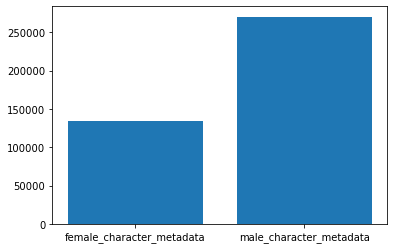

In [58]:
# Make a random dataset:
height = [len(female_character_metadata), len(male_character_metadata)]
bars = ('female_character_metadata', 'male_character_metadata')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

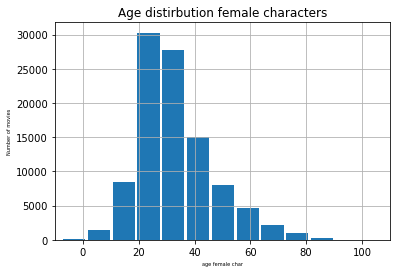

In [72]:
female_character_metadata['Actor_age_movie_release'].hist(bins = 900)

plt.xlabel('age female char')
plt.ylabel('Number of movies')
plt.xlim([-10, 110])
plt.title('Age distirbution female characters')

plt.show()

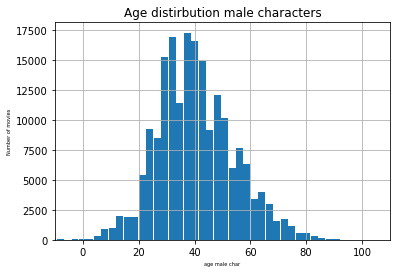

In [69]:
male_character_metadata['Actor_age_movie_release'].hist(bins = 400)

plt.xlabel('age male char')
plt.ylabel('Number of movies')
plt.xlim([-10, 110])
plt.title('Age distirbution male characters')

plt.show()

### Name clusters

In [26]:
# 970 unique character names used in at least two different movies, along with 2,666 instances of those types
# The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

# download file txt, convert it into csv and store it as a dataframe in name_clusters
name_clusters = pd.read_csv('./data/name.clusters.txt', sep='\t')

# convert column header into the first row of the data frame 
name_clusters = name_clusters.columns.to_frame().T.append(name_clusters, ignore_index=True)
name_clusters.columns = range(len(name_clusters.columns))

# name header 
name_clusters.columns = ['double_character', 'movie_ID']

In [27]:
name_clusters.head(3)

,double_character,movie_ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn


### Plot summaries 

In [76]:
# download file txt, convert it into csv and store it as a dataframe in plot_summaries
plot_summaries = pd.read_csv('./data/plot_summaries.txt', sep='\t')

# convert column header into the first row of the data frame 
plot_summaries = plot_summaries.columns.to_frame().T.append(plot_summaries, ignore_index=True)
plot_summaries.columns = range(len(plot_summaries.columns))

# name header 
plot_summaries.columns = ['Wikipedia_Movie_ID', 'plot_summary']

In [77]:
plot_summaries.head(3)

,Wikipedia_Movie_ID,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...


In [78]:
# count number of words 
def count_words_simple(x):
    return len(x.split(" "))

# add in the plot_summaries dataframe a column with the legth of each plot 
plot_summaries['plot_summary_words_length'] = plot_summaries['plot_summary'].apply(lambda x: count_words_simple(x))

In [82]:
plot_summaries.head(3)

,Wikipedia_Movie_ID,plot_summary,plot_summary_words_length
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25
1,31186339,The nation of Panem consists of a wealthy Capi...,780
2,20663735,Poovalli Induchoodan is sentenced for six yea...,504


In [83]:
print('mean of the plot summaries length all movies', plot_summaries['plot_summary_words_length'].mean())

mean of the plot summaries length all movies 312.30851239864785


Text(0, 0.5, 'Number of movies')

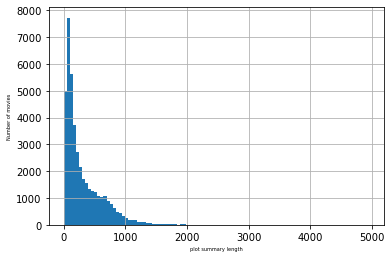

In [84]:
#we use pandas wrapper
plot_summaries['plot_summary_words_length'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('plot summary length')
plt.ylabel('Number of movies')

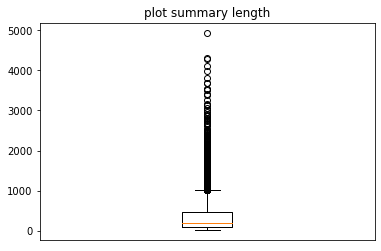

In [85]:
plt.boxplot(plot_summaries['plot_summary_words_length'])
plt.xticks([])
plt.title('plot summary length');